### Step 1. Get Data from FRED Economic Data

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr

In [14]:
fed_data1=pdr.get_data_fred(['INDPRO', 'FEDFUNDS', 'CAUR'])

### Step 2. Check the Data

In [15]:
fed_data1.describe()

,INDPRO,FEDFUNDS,CAUR
count,59.000000,59.000000,59.000000
mean,100.004468,1.120000,6.174576
std,3.841090,0.859501,3.054708
min,84.201800,0.050000,4.100000
25%,99.001150,0.090000,4.200000
50%,101.091800,1.150000,4.600000
75%,102.349150,1.870000,7.600000
max,104.165900,2.420000,16.000000


### Step 3. Specify the Model

In [7]:
import statsmodels.formula.api as smf

In [17]:
formula='INDPRO~FEDFUNDS+CAUR'

### Step 4. Run the Model

In [18]:
reg1=smf.ols(formula, fed_data1).fit()

### Step 5. View the Regression Output

In [19]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.36e-19
Time:                        14:33:28   Log-Likelihood:                -116.84
No. Observations:                  59   AIC:                             239.7
Df Residuals:                      56   BIC:                             245.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    106.0664      1.127     94.142      0.0

### Step 6. Residual and Prediction Plots 

In [20]:
uhat=reg1.resid

In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

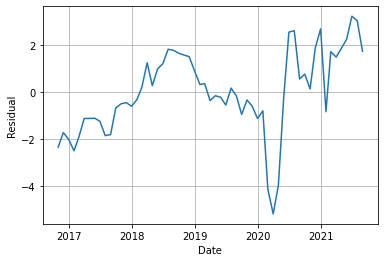

In [24]:
plt.plot(uhat)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show

In [25]:
yhat=reg1.fittedvalues

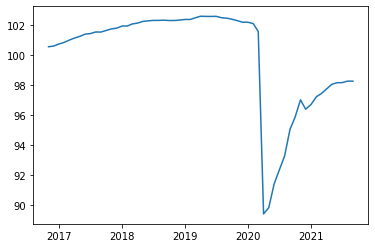

In [26]:
plt.plot(yhat)

<function matplotlib.pyplot.show(*args, **kw)>

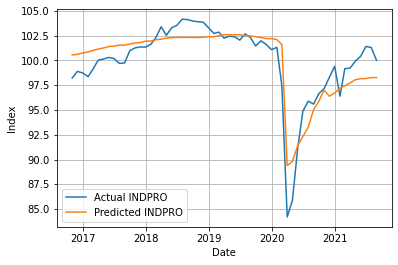

In [28]:
plt.plot(fed_data1.INDPRO,label='Actual INDPRO')
plt.plot(yhat, label='Predicted INDPRO')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
legend=plt.legend()
plt.show